<a href="https://colab.research.google.com/github/GreggHeller1/gregg-circ-homer-models/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
False


In [116]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/gregg-circ-homer-models.git

In [120]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/gregg-circ-homer-models
    
from src import data_io as io
from src import plotting as plot
from src import computation as comp
from src import helper_functions as hf

In [121]:
#imports
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.figure

#import xarray as xr
#import numpy as np
#import ipdb
#from PIL import Image #this needs to be after matplotlib??
#from scipy.stats import stats   
#import cProfile
#cProfile.run('out = comp.function(inputs)') #replace "function" and "inputs" to profile the function you want to optimize


In [122]:
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/gregg-circ-homer-models/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
cwd = os.getcwd()
repo_path = os.path.split(cwd)[0]

print(os.path.exists(test_path))


demo_data\test.txt
False


In [15]:
#define paths Test that your data exists here
data_path = os.path.join(repo_path, 'demo_data', '3D Spine volume (um3).csv')
print(os.path.exists(data_path))

True


In [16]:
#data inputs

In [11]:
#data manipulation

In [ ]:
#Save data

In [123]:
#Functions (to be pulled into different files later)

def restructure_df(df_in, x_label) -> pd.DataFrame:
    df_list = []
    for column in df_in.columns:
        for measure in df_in[column]:
            #if column == '0d sh-scramble':
            #    adjusted_volume = volume/4/1.7/2.5
            #else:
            #adjusted_volume = measure/(3.5**3)#/4/1.7
            row_dict = {
                'source_experiment': column,
                x_label: measure
            }
            df_list.append(row_dict)

    resturctured_df = pd.DataFrame(df_list)
    return resturctured_df




In [112]:
def main(data_path, prefix, x_label, scale_factor=1 ) -> tuple([matplotlib.figure.Figure, plt.Axes]):  
    #typehints from here https://stackoverflow.com/questions/43890844/pythonic-type-hints-with-pandas
    
    #Load data to make plots
    input_df = pd.read_csv(data_path) 
    
    #restructure df for plotting
    spine_measure_df = restructure_df(input_df, x_label)

    print(spine_measure_df.head(5))
    #rescale to account for expansion
    spine_measure_df[x_label] = spine_measure_df[x_label]/scale_factor

    #make plots
    fig, ax = plt.subplots()
    ax = sns.histplot(data=spine_measure_df, x=x_label, kde=True, log_scale=True, hue="source_experiment", element="step",
        stat="percent", common_norm=False,)

    #save plots
    save_path = os.path.join(repo_path, 'demo_data', f'{prefix}_histograms.png')
    fig.savefig(save_path, bbox_inches='tight')
    return (fig, ax)

True
  source_experiment  spine_volume_um3
0    0d sh-scramble            7.0388
1    0d sh-scramble            2.4294
2    0d sh-scramble            3.1988
3    0d sh-scramble            2.7013
4    0d sh-scramble            1.5627


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='spine_volume_um3', ylabel='Percent'>)

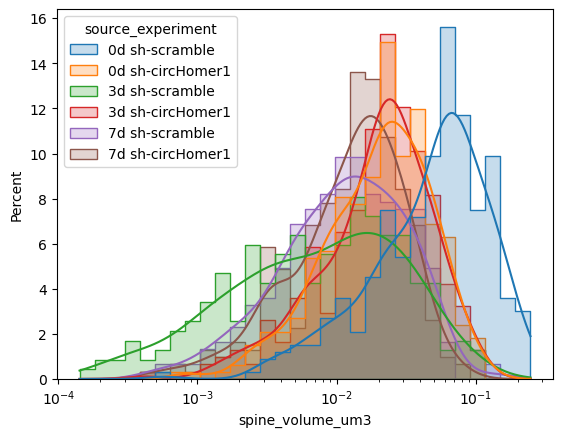

In [113]:
data_path = os.path.join(repo_path, 'demo_data', '3D Spine volume (um3).csv')
print(os.path.exists(data_path))
main(data_path, 'volume', 'spine_volume_um3', scale_factor=3.5**3)

True
  source_experiment  spine_diameter_um
0    0d sh-scramble              0.938
1    0d sh-scramble              0.744
2    0d sh-scramble              2.172
3    0d sh-scramble              0.971
4    0d sh-scramble              0.527


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='spine_diameter_um', ylabel='Percent'>)

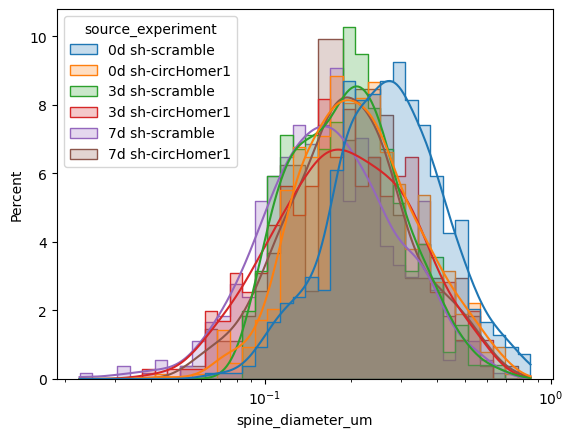

In [114]:
data_path = os.path.join(repo_path, 'demo_data', '1D Spine diameter (um).csv')
print(os.path.exists(data_path))
main(data_path, 'diameter', 'spine_diameter_um', scale_factor=3.5)